In [51]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
import dhlab.token_map as tm
from collections import Counter
import qgrid

In [41]:
import pandas as pd

def alle_korpusnavn(korpus, ratio=0.3, cutoff=0):
    urner = nb.pure_urn(korpus)
    alle_navn = tm.combine_names(tm.corpus_names(urner, ratio = ratio, cutoff = cutoff))
    return alle_navn

def tell_navn(korpus, token_map):
    res = dict()
    for urn in korpus['urn']:
        res[urn] = tm.count_name_strings(str(urn), token_map).to_dict()[0]
    return pd.DataFrame(pd.DataFrame(res).sum(axis=1).sort_values(ascending=False))

In [2]:
fargekoder = """Guro-bøkene: R251/G213/B196 -- #FBD5C4
Kaos-bøkene: 71/173/130 -- #47AD82
Ola Aleksander-bøkene: 255/216/97 --#FFD861
Ellen Andrea og småtassene: 127/95/147 -- #7F5F93
Lillebror og Knerten: 58/172/190 -- #3AACBE
Mormor: 232/64/78 -- #E8404E
Aurora og sokrates blå: 47/58/131 – #2F3A83"""

In [34]:
korpus_raw = nb.book_corpus(author="vestly%anne%cath%", limit = 1000)

In [35]:
titles = Counter(dict(Counter(korpus_raw.title.values).most_common()))

urns = []
for title in titles:
    if titles[title]:
        urn = list(korpus_raw[korpus_raw.title == title].sort_values(by='year', ascending = False).urn)[0]
        urns.append(urn)
    
        

In [74]:
urns = nb.pure_urn("""https://urn.nb.no/URN:NBN:no-nb_digibok_2014031108251
https://urn.nb.no/URN:NBN:no-nb_digibok_2015070708013
https://urn.nb.no/URN:NBN:no-nb_digibok_2010110906072
https://urn.nb.no/URN:NBN:no-nb_digibok_2010070605087




https://urn.nb.no/URN:NBN:no-nb_digibok_2014111708080
https://urn.nb.no/URN:NBN:no-nb_digibok_2018061207028
https://urn.nb.no/URN:NBN:no-nb_digibok_2018072607262
https://urn.nb.no/URN:NBN:no-nb_digibok_2008093000058
https://urn.nb.no/URN:NBN:no-nb_digibok_2009041404081

https://urn.nb.no/URN:NBN:no-nb_digibok_2012091408165
https://urn.nb.no/URN:NBN:no-nb_digibok_2009021000094



https://urn.nb.no/URN:NBN:no-nb_digibok_2015010808013
https://urn.nb.no/URN:NBN:no-nb_digibok_2017053048056
https://urn.nb.no/URN:NBN:no-nb_digibok_2013061708033
https://urn.nb.no/URN:NBN:no-nb_digibok_2014013106097
https://urn.nb.no/URN:NBN:no-nb_digibok_2008052804024
https://urn.nb.no/URN:NBN:no-nb_digibok_2007071100044

https://urn.nb.no/URN:NBN:no-nb_digibok_2010120820039
https://urn.nb.no/URN:NBN:no-nb_digibok_2008103104089



https://urn.nb.no/URN:NBN:no-nb_digibok_2014013106098
https://urn.nb.no/URN:NBN:no-nb_digibok_2011031005056
https://urn.nb.no/URN:NBN:no-nb_digibok_2015042306048

https://urn.nb.no/URN:NBN:no-nb_digibok_2009011200085
https://urn.nb.no/URN:NBN:no-nb_digibok_2007072301006
https://urn.nb.no/URN:NBN:no-nb_digibok_2007072004008



https://urn.nb.no/URN:NBN:no-nb_digibok_2012121106015
https://urn.nb.no/URN:NBN:no-nb_digibok_2007060104052
https://urn.nb.no/URN:NBN:no-nb_digibok_2008102200042
https://urn.nb.no/URN:NBN:no-nb_digibok_2007062101032
https://urn.nb.no/URN:NBN:no-nb_digibok_2012111406308
https://urn.nb.no/URN:NBN:no-nb_digibok_2007070501032
https://urn.nb.no/URN:NBN:no-nb_digibok_2007070500007



https://urn.nb.no/URN:NBN:no-nb_digibok_2012092106162
https://urn.nb.no/URN:NBN:no-nb_digibok_2013011806050
https://urn.nb.no/URN:NBN:no-nb_digibok_2009042200010
https://urn.nb.no/URN:NBN:no-nb_digibok_2013102906120
https://urn.nb.no/URN:NBN:no-nb_digibok_2012091705071



https://urn.nb.no/URN:NBN:no-nb_digibok_2008062304037
https://urn.nb.no/URN:NBN:no-nb_digibok_2013100805023
https://urn.nb.no/URN:NBN:no-nb_digibok_2013100305183
https://urn.nb.no/URN:NBN:no-nb_digibok_2010052003065
https://urn.nb.no/URN:NBN:no-nb_digibok_2010043003036



https://urn.nb.no/URN:NBN:no-nb_digibok_2008102100068
https://urn.nb.no/URN:NBN:no-nb_digibok_2011060106049
https://urn.nb.no/URN:NBN:no-nb_digibok_2014081905070""")

In [75]:
korpus = nb.frame(nb.metadata(urns), "urn author year title subtitle publisher genre sesam lang trans".split())

In [76]:
korpus

,urn,author,year,title,subtitle,publisher,genre,sesam,lang,trans
0,2014031108251,"Vestly, Anne-Cath.",1994,Ole Aleksander Filibom-bom-bom,,Tiden,fiction,a129a1b3431a53c3f3603e6556c10758,nob,
1,2015070708013,"Vestly, Anne-Cath.",1979,Ole Aleksander på farten,,Tiden,novel,04d824e5dd1785f02263f81b442e5ad8,nob,
2,2010110906072,"Vestly, Anne-Cath.",1955,Ole Aleksander får skjorte,,Tiden,notfiction,08a71482eeaad0c1a4c2476835e0ce9f,nob,
3,2010070605087,"Vestly, Anne-Cath.",1956,Ole Aleksander og bestemor til værs,,Tiden,fiction,229d494021e1f6803ca6b5d662fa5c75,nob,
4,2014111708080,"Vestly, Anne-Cath.",1994,"Åtte små, to store og en lastebil",,Tiden,fiction,3bddefb6c44d7711d15b6969ede5e647,nob,
5,2008093000058,"Vestly, Anne-Cath.",1999,liten takk fra Anton,,Gyldendal Tiden,fiction,a5501331ec8defd776da07b68235e117,nob,
6,2009041404081,"Vestly, Anne-Cath.",1998,Mormor og de åtte ungene,,"Gyldendal Tiden;Oslo : Gyldendal Tiden, cop. 1998",fiction,749d368f193c900df832d1090466864e,nob,
7,2012091408165,"Vestly, Anne-Cath.",1986,Mormor og de åtte ungene på sykkeltur i Danmark,,Tiden,fiction,37c89c73491546d434af07314cb1e060,nob,
8,2009021000094,"Vestly, Anne-Cath.",1999,Morten og mormor og Stormvind,,Gyldendal Tiden,fiction,8eb66804535d7ec973b66c1169f5bbff,nob,
9,2015010808013,"Vestly, Anne-Cath.",1990,Lillebror og Knerten,,"Bokklubbens barn;[Stabekk] : Bokklubbens barn,...",fiction,c871a19b13d399950656aefd61fcc5c7,nob,


In [77]:
navn = alle_korpusnavn(korpus,ratio=0.2, cutoff=10)

# Single navn fra bøkene

In [78]:
single_navn = list(navn[0].keys())

In [79]:
single_navn[:10]

['Aleksander',
 'Er',
 'Filibom-bom-',
 'Ja',
 'Mons',
 'Nei',
 'Ole',
 'Puffen',
 'Skal',
 'Aleksander,']

# Navn fra Anne Kristins excelfil

In [80]:
vestlys_verden = pd.read_excel("Vestlys verden.xlsx", header=None )

In [82]:
vestlys_v = qgrid.show_grid(vestlys_verden.fillna(''))
vestlys_v

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [83]:
a = vestlys_v.get_changed_df()

In [117]:
navnene = [x.split()[0] for x in list(a[1]) if x != '']

In [118]:
navnene

['Ole',
 'mor',
 'far',
 'bestefar',
 'bestemor',
 'Mons',
 'Puffen',
 'Ida',
 'Tante',
 'Bitteliten',
 'ingen',
 'Oliver',
 'ingen',
 'mor',
 'far',
 'Maren',
 'Martin',
 'Marte',
 'Mads',
 'Mona',
 'Milly',
 'Mina',
 'Morten',
 'mormor',
 'Hulda',
 'Henrik',
 'tante',
 'den',
 'den',
 'Ovnsrøret',
 'mormor',
 'Mads',
 '5',
 'Anne',
 'Lars',
 'Anton',
 'Anne-Ophelia',
 "Go'Rosa",
 'Mormors',
 'ingen',
 'Rosa',
 'Georg',
 'Ole',
 'Lillebror',
 'Storebror',
 'mor',
 'far',
 'Knerten',
 'snekkeren',
 'Prinsessen/Vesla',
 'faren',
 'tante',
 'ingen',
 'Karoline',
 'Lille-Knerten',
 'Lille-Bjørn',
 'Tyven',
 'Magnus',
 'bestefar',
 'moren',
 'Tilla',
 'Konstance',
 'Ivar',
 'Forundringspakken',
 'Lillemamma',
 'treffer',
 'Aurora',
 'Sokrates',
 'Edvard',
 'Marie',
 'Knut',
 'Nusse',
 'Britt-Karen',
 "mamma'n",
 'mormor',
 'pike',
 'Bestefarmor',
 'onkel',
 'besøk',
 'Veslestuten',
 'Putten',
 'Lillebror',
 'mormor',
 'Anette',
 'mormors',
 'Frøken',
 'Valdemar',
 'Bare',
 'Sorenskriveren'

In [119]:
navnene_redigert = list(set(['Ole',
 'mor',
 'far',
 'bestefar',
 'bestemor',
 'Mons',
 'Puffen',
 'Ida',
 'Tante',
 'Bitteliten',
 'ingen',
 'Oliver',
 'ingen',
 'mor',
 'far',
 'Maren',
 'Martin',
 'Marte',
 'Mads',
 'Mona',
 'Milly',
 'Mina',
 'Morten',
 'mormor',
 'Hulda',
 'Henrik',
 'Ovnsrøret',
 'mormor',
 'Mads',
 'Anne',
 'Lars',
 'Anton',
 'Anne-Ophelia',
 "Go'Rosa",
 'Mormors',
 'ingen',
 'Rosa',
 'Georg',
 'Ole',
 'Lillebror',
 'Storebror',
 'mor',
 'far',
 'Knerten',
 'snekkeren',
 'Prinsessen/Vesla',
 'faren',
 'tante',
 'Karoline',
 'Lille-Knerten',
 'Lille-Bjørn',
 'Tyven',
 'Magnus',
 'bestefar',
 'moren',
 'Tilla',
 'Konstance',
 'Ivar',
 'Forundringspakken',
 'Lillemamma',
 'Aurora',
 'Sokrates',
 'Edvard',
 'Marie',
 'Knut',
 'Nusse',
 'Britt-Karen',
 "mamma'n",
 'mormor',
 'pike',
 'Bestefarmor',
 'onkel',
 'besøk',
 'Veslestuten',
 'Putten',
 'Lillebror',
 'mormor',
 'Anette',
 'mormors',
 'Frøken',
 'Valdemar',
 'Sorenskriveren',
 'Sorenskriverdamen',
 'Johanna',
 'Rakel',
 'mormors',
 'Onkel',
 'Nusse',
 'Knut',
 'Ginneken',
 'Froa',
 'Guro',
 'Erle,',
 'Kjenner',
 'Tullemor',
 'Lillen',
 'Gamle',
 'Britt-Karen',
 'Vaktmester',
 'Personligheten',
 'mormor',
 'Nusse',
 "mamma'n",
 'Knut',
 'Aurora',
 'Nils',
 'Edvard',
 'Marie',
 'Lille-Bjørn',
 'Tullemor',
 'Julefeiring:',
 'Bestefar',
 'Tullemor',
 'Ole',
 'Allan,',
 'Erle',
 'Moren',
 'Kåre',
 'Sykepleier',
 'Pike',
 'Ellen',
 "Go'Rosa",
 'Aurora',
 'Kaos',
 'Far',
 'Mor',
 'Eva',
 'Bjørnar',
 'Faster',
 'Fastermann',
 'Lilla',
 'Lubben',
 'Bjarne',
 'Gammelbudeia',
 'Mor',
 'Tullemor',
 'Bestefar',
 'Tirilltoppen',
 'mormor',
 'Mormor',
 'Ellen',
 'Lagertha',
 'Pappa',
 'Sirimamma',
 'Marte',
 'Guro',
 'Lille-Bjørn',
 'Erle',
 'Bjørn',
 'Sokrates',
 'mormor',
 'Lillebror',
 'Knerten',
 'Tilla',
 'Konstance',
 'Allan',
 'Tullemor',
 'Bestefar',
 'Aurora',
 'Nusse',
 'Bestemor',
 'Bestefar',
 'Lillebror',
 'Tilla',
 'Konstance',
 'Magnus',
 'Bestefaren',
 'Ivar',
 'Knerten',
 'Karoline',
 'Lille-Knerten',
 'Leo',
 'Leo',
 'Kjartan',
 'Bjørnar',
 'Kaos',
 'Rosa',
 'Geir',
 'Mormors',
 'Chris,',
 'Amund',
 'Tore',
 'Leo',
 'Kjartan',
 'Lagertha',
 'Billy',
 'Leander',
 'Maren',
 'George',
 'Rosa',
 'Monrad',
 'Geir',
 'Erling']))

In [102]:
ac_navn = list(set([x for x in list(a[1]) if x != '']))

In [103]:
ac_navn[:10]

['bestemor',
 'Sorenskriveren - Thomas',
 'Kaos',
 'Rakel',
 'Anne (på bondegården)',
 'Maren',
 "mamma'n til Nusse",
 'Ole Aleksander, Mons, Ida, Oliver, tante Petra, Bitteliten, bestefar, bestemor',
 'Marie',
 'mor']

Sjekk hva som er felles:

In [86]:
[x for x in ac_navn if x in single_navn]

['Kaos',
 'Rakel',
 'Maren',
 'Marie',
 'Bjørnar',
 'Konstance',
 'Lillemamma',
 'Johanna',
 'Allan',
 'Rosa',
 'Hulda',
 'Kjartan',
 'Monrad',
 'Knut',
 'Ida',
 'Knerten',
 'Mons',
 'Leo',
 'Tullemor',
 'Guro',
 'Mina',
 'Tilla',
 'Martin',
 'George',
 'Bjørn',
 'Henrik',
 'Tore',
 'Lagertha',
 'Sokrates',
 'Mads',
 'Magnus',
 'Lillen',
 'Milly',
 'Edvard',
 'Karoline',
 'Lille-Bjørn',
 'Erle',
 'Mona',
 'Lille-Knerten',
 'Ginneken',
 'Aurora',
 'Nusse',
 'Ivar',
 'Marte',
 'Amund',
 'Oliver',
 'Lillebror']

In [139]:
import requests

def mng(urn, wordbag, cutoff=0):
    r = requests.post("https://api.nb.no/ngram/graph", json={'urn':urn, 'words':wordbag})
    return r.json()

In [140]:
mng(str(korpus.urn[0]), navnene_redigert[:2])

[['bestemor', 'bestemor', 11]]

In [141]:
name_graphs = []
for urn in korpus.urn:
    print(urn)
    try:
        name_graphs.append(nb.make_network_graph(str(urn), navnene_redigert[:10]))
    except:
        print('galt')

2014031108251
2015070708013
2010110906072
2010070605087
2014111708080
2008093000058
2009041404081
2012091408165
2009021000094
2015010808013
2013061708033
2014013106097
2008052804024
2007071100044
2010120820039
2008103104089
2014013106098
2011031005056
2015042306048
2009011200085
2007072301006
2007072004008
2012121106015
2007060104052
2008102200042
2007062101032
2012111406308
2007070501032
2007070500007
2012092106162
2013011806050
2009042200010
2013102906120
2012091705071
2008062304037
2013100805023
2013100305183
2010052003065
2010043003036
2008102100068
2011060106049
2014081905070


In [158]:
import networkx as nx

In [159]:
totg = nx.Graph([x for g in name_graphs for x in g.edges(data=True)])

In [162]:
[x for g in name_graphs for x in g.edges(data=True)]

[('Maren', 'bestemor', {'weight': 1.0}),
 ('Maren', 'mor', {'weight': 2.0}),
 ('bestemor', 'mor', {'weight': 5.0}),
 ('Kaos', 'Lubben', {'weight': 2.0}),
 ('Maren', 'bestemor', {'weight': 2.0}),
 ('Maren', 'mor', {'weight': 2.0}),
 ('bestemor', 'mor', {'weight': 8.0}),
 ('Maren', 'mor', {'weight': 2.0}),
 ('bestemor', 'mor', {'weight': 5.0}),
 ('Maren', 'mor', {'weight': 15.0}),
 ('Maren', 'mor', {'weight': 18.0}),
 ('mor', 'bestemor', {'weight': 2.0}),
 ('Maren', 'mor', {'weight': 4.0}),
 ('Maren', 'mor', {'weight': 14.0}),
 ('Forundringspakken', 'mor', {'weight': 12.0}),
 ('Forundringspakken', 'mor', {'weight': 15.0}),
 ('mor', 'bestemor', {'weight': 2.0}),
 ('bestemor', 'mor', {'weight': 1.0}),
 ('Maren', 'mor', {'weight': 1.0}),
 ('Marie', 'mor', {'weight': 1.0}),
 ('Valdemar', 'mor', {'weight': 10.0}),
 ('Valdemar', 'mor', {'weight': 13.0}),
 ('Marie', 'mor', {'weight': 2.0}),
 ('mor', 'Valdemar', {'weight': 9.0}),
 ('Maren', 'mor', {'weight': 1.0}),
 ('Maren', 'mor', {'weight': 2

In [161]:
totg.edges()

EdgeView([('Maren', 'bestemor'), ('Maren', 'mor'), ('Maren', 'Kaos'), ('bestemor', 'mor'), ('bestemor', 'Kaos'), ('mor', 'Forundringspakken'), ('mor', 'Marie'), ('mor', 'Valdemar'), ('mor', 'Kaos'), ('mor', 'Lubben'), ('Kaos', 'Lubben')])

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


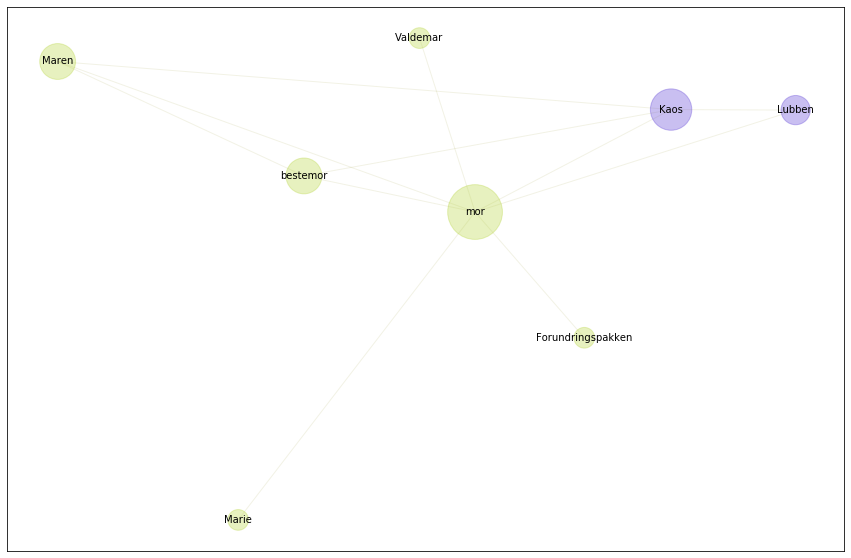

In [160]:
gnl.show_graph(totg)